<a href="https://colab.research.google.com/github/Ehtisham1053/Classification-ML-algorithms/blob/main/Elastic_net_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification

In [3]:
class ElasticNetLogisticRegression:
    def __init__(self, alpha=0.01, l1_ratio=0.5, epochs=1000, tol=1e-5):
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.epochs = epochs
        self.tol = tol
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = len(y)
        predictions = self.sigmoid(X @ self.weights + self.bias)
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        l1_term = self.l1_ratio * np.sum(np.abs(self.weights))
        l2_term = (1 - self.l1_ratio) * np.sum(self.weights ** 2)
        return loss + (self.alpha / (2 * m)) * (l1_term + l2_term)

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.epochs):
            linear_model = X @ self.weights + self.bias
            predictions = self.sigmoid(linear_model)

            gradient_w = (X.T @ (predictions - y)) / m + (self.alpha * self.l1_ratio * np.sign(self.weights) + self.alpha * (1 - self.l1_ratio) * self.weights) / m
            gradient_b = np.sum(predictions - y) / m

            self.weights -= self.alpha * gradient_w
            self.bias -= self.alpha * gradient_b

            if np.linalg.norm(gradient_w) < self.tol:
                break

    def predict(self, X):
        return (self.sigmoid(X @ self.weights + self.bias) >= 0.5).astype(int)



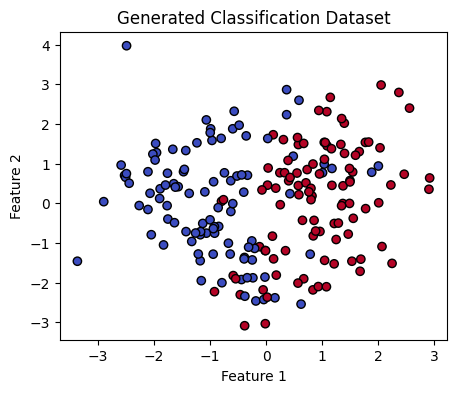

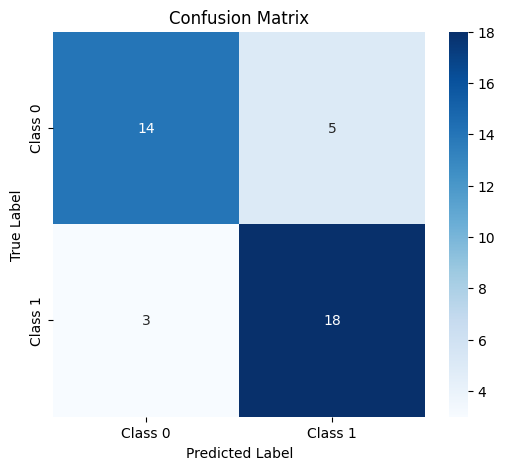

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.78      0.86      0.82        21

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



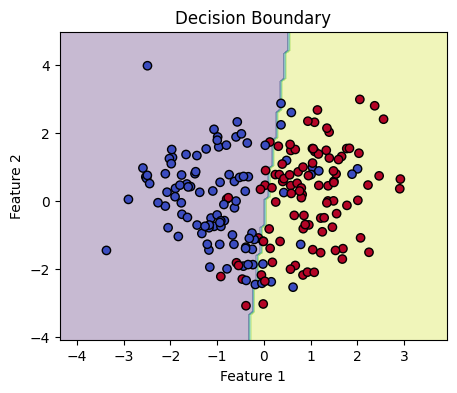

In [9]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Generated Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

model = ElasticNetLogisticRegression(alpha=0.1, l1_ratio=0.5, epochs=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model, X, y)
